In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

print("Set up complete")

Set up complete


In [155]:
data = pd.read_csv("loan_detection.csv")

In [156]:
data.head()

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,Loan_Status_label
0,56,1,999,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
1,57,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,37,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,40,1,999,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,56,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [157]:
data.size

2471280

In [158]:
data.shape

(41188, 60)

In [159]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 60 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   age                            41188 non-null  int64
 1   campaign                       41188 non-null  int64
 2   pdays                          41188 non-null  int64
 3   previous                       41188 non-null  int64
 4   no_previous_contact            41188 non-null  int64
 5   not_working                    41188 non-null  int64
 6   job_admin.                     41188 non-null  int64
 7   job_blue-collar                41188 non-null  int64
 8   job_entrepreneur               41188 non-null  int64
 9   job_housemaid                  41188 non-null  int64
 10  job_management                 41188 non-null  int64
 11  job_retired                    41188 non-null  int64
 12  job_self-employed              41188 non-null  int64
 13  job_services    

In [160]:
data.describe()

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,Loan_Status_label
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,...,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.963217,0.087623,0.253035,0.224677,0.035350,0.025736,...,0.013839,0.190031,0.206711,0.209357,0.196416,0.197485,0.103234,0.863431,0.033335,0.112654
std,10.42125,2.770014,186.910907,0.494901,0.188230,0.282749,0.434756,0.417375,0.184665,0.158348,...,0.116824,0.392330,0.404951,0.406855,0.397292,0.398106,0.304268,0.343396,0.179512,0.316173
min,17.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.00000,1.000000,999.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,38.00000,2.000000,999.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,47.00000,3.000000,999.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,98.00000,56.000000,999.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Missing and Duplicated data -

In [161]:
data.isnull().sum()

age                              0
campaign                         0
pdays                            0
previous                         0
no_previous_contact              0
not_working                      0
job_admin.                       0
job_blue-collar                  0
job_entrepreneur                 0
job_housemaid                    0
job_management                   0
job_retired                      0
job_self-employed                0
job_services                     0
job_student                      0
job_technician                   0
job_unemployed                   0
job_unknown                      0
marital_divorced                 0
marital_married                  0
marital_single                   0
marital_unknown                  0
education_basic.4y               0
education_basic.6y               0
education_basic.9y               0
education_high.school            0
education_illiterate             0
education_professional.course    0
education_university

In [162]:
data.duplicated().sum()

np.int64(2417)

In [163]:
data[data.duplicated()]

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,Loan_Status_label
10,41,1,999,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
11,25,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
16,35,1,999,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
31,59,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
104,52,1,999,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40928,21,1,999,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
41131,58,1,999,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
41167,32,3,999,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
41172,31,1,999,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,1


In [164]:
data.dtypes

age                              int64
campaign                         int64
pdays                            int64
previous                         int64
no_previous_contact              int64
not_working                      int64
job_admin.                       int64
job_blue-collar                  int64
job_entrepreneur                 int64
job_housemaid                    int64
job_management                   int64
job_retired                      int64
job_self-employed                int64
job_services                     int64
job_student                      int64
job_technician                   int64
job_unemployed                   int64
job_unknown                      int64
marital_divorced                 int64
marital_married                  int64
marital_single                   int64
marital_unknown                  int64
education_basic.4y               int64
education_basic.6y               int64
education_basic.9y               int64
education_high.school    

In [165]:
for i in data.columns:
    if data[i].isnull().sum() > 0:
        print(f"----------{i}---------")
        print(f" Mean of {i} : {data[i].mean()} ")
        print(f" Median of {i} : {data[i].median()} ")
        sns.distplot(data[i],color = "green")
        plt.show()

In [166]:
for i in data.columns:
    if data[i].isnull().sum() > 0:
       
        print(f"mean of {i} : {data[i].mean()}")
        print(f"median of {i} : {data[i].median()}\n")

### Imbalance Data -

In [167]:
data["Loan_Status_label"]

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: Loan_Status_label, Length: 41188, dtype: int64

In [168]:
data["Loan_Status_label"].value_counts()

Loan_Status_label
0    36548
1     4640
Name: count, dtype: int64

## Outliers -

---------age---------


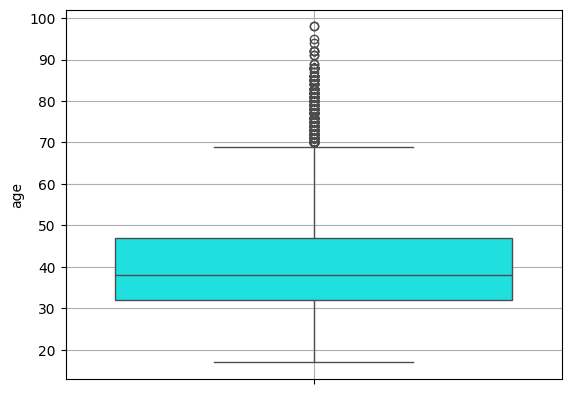

---------campaign---------


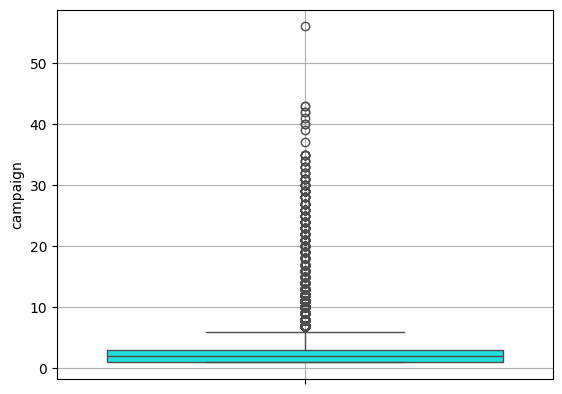

---------pdays---------


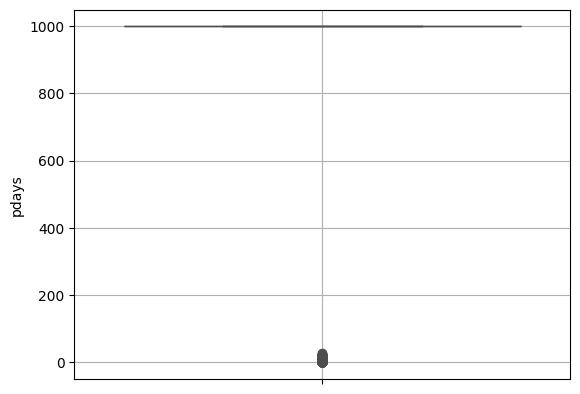

---------previous---------


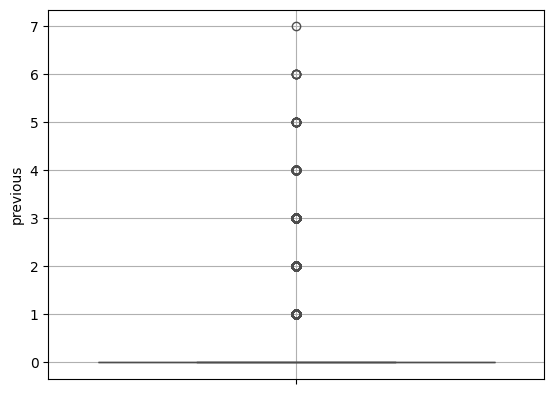

---------no_previous_contact---------


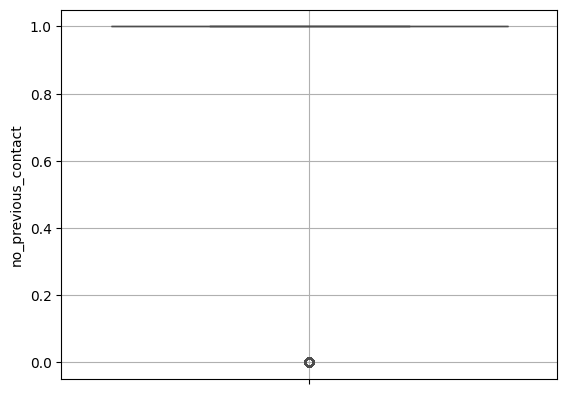

---------not_working---------


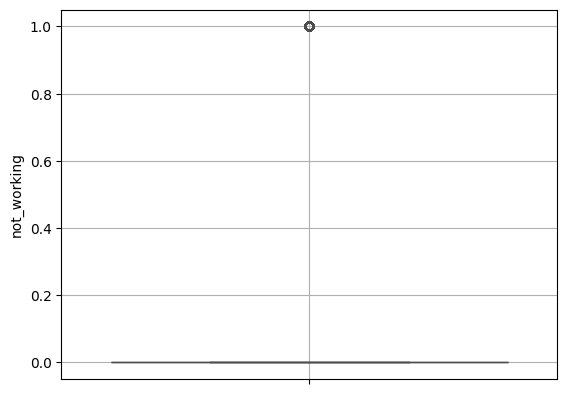

---------job_admin.---------


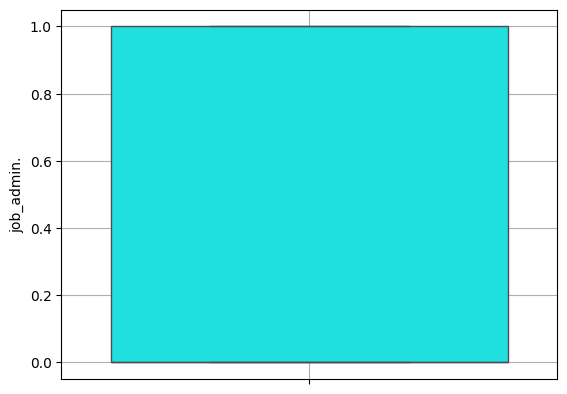

---------job_blue-collar---------


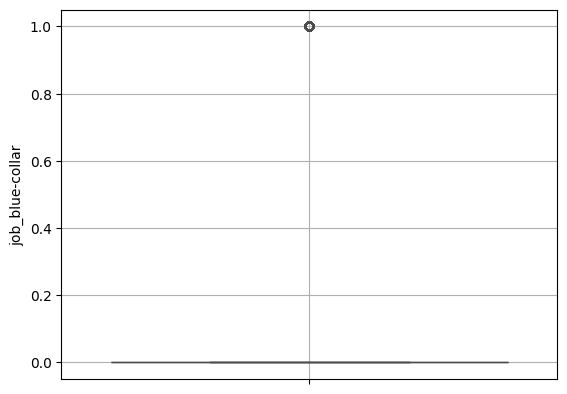

---------job_entrepreneur---------


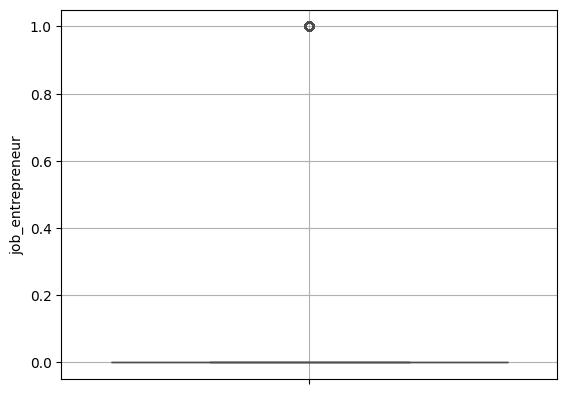

---------job_housemaid---------


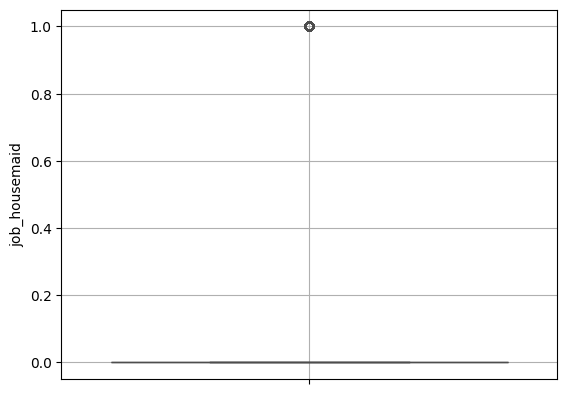

---------job_management---------


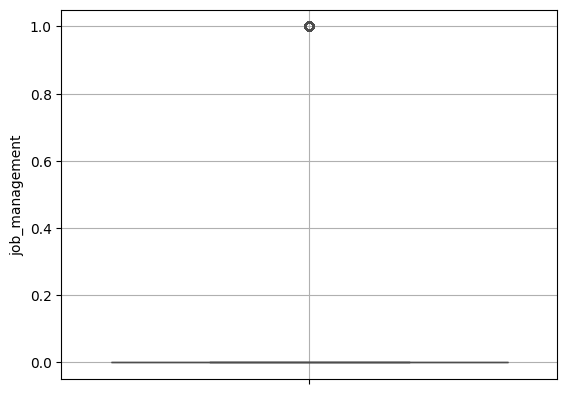

---------job_retired---------


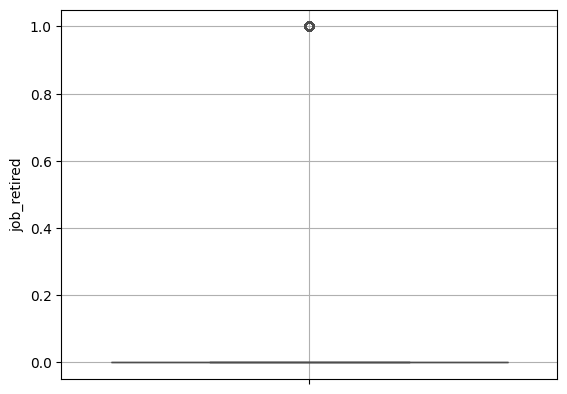

---------job_self-employed---------


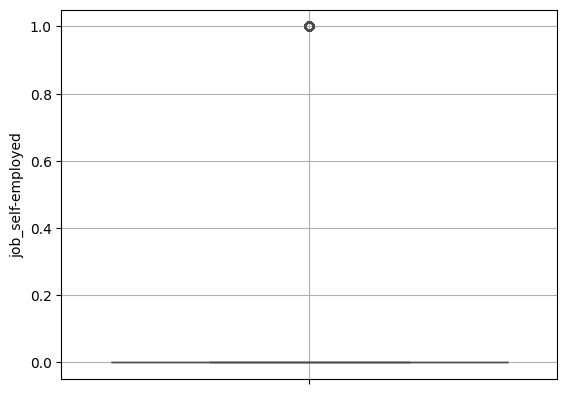

---------job_services---------


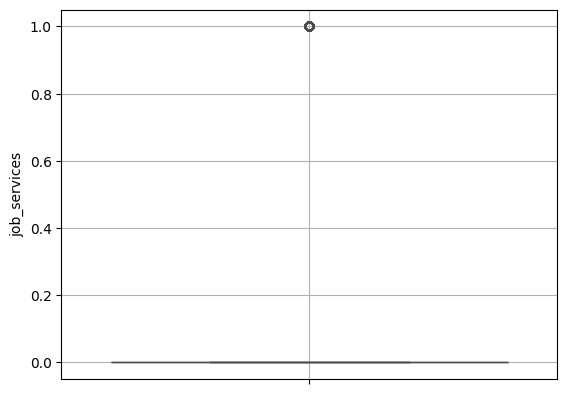

---------job_student---------


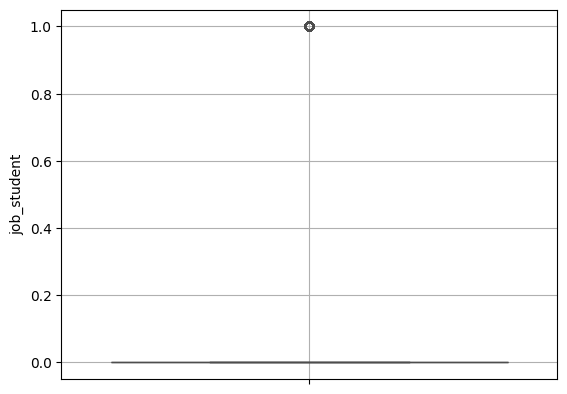

---------job_technician---------


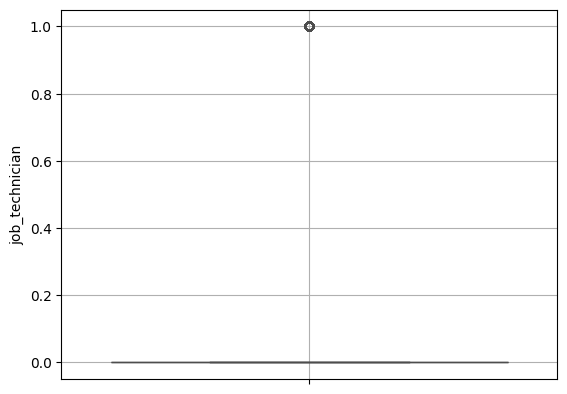

---------job_unemployed---------


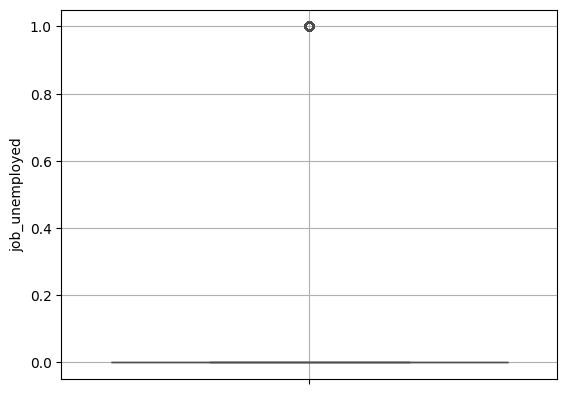

---------job_unknown---------


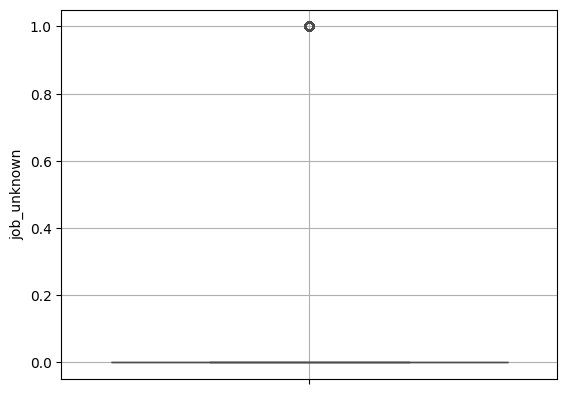

---------marital_divorced---------


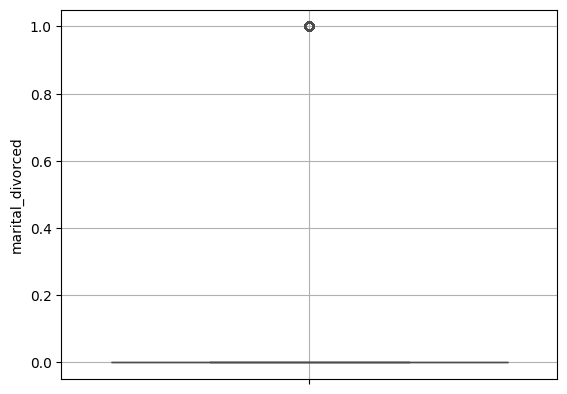

---------marital_married---------


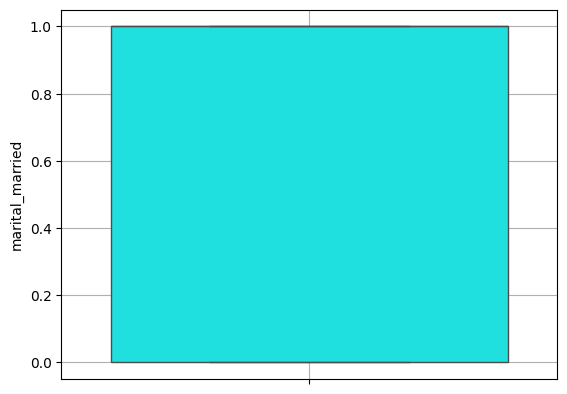

---------marital_single---------


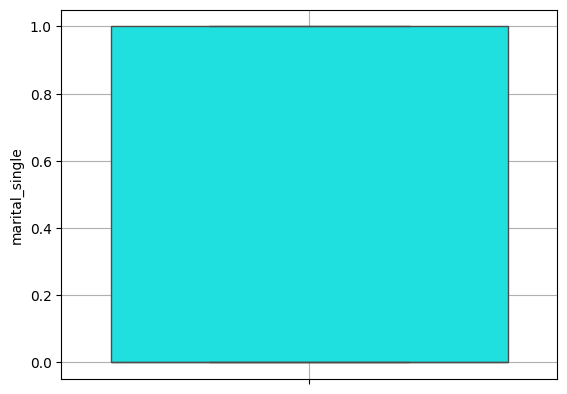

---------marital_unknown---------


In [ ]:
for i in data.columns:
    if i == "Loan_Status_label":
        pass
    else:
        print(f"---------{i}---------")
        sns.boxplot(data[i],color = "aqua")
        plt.grid()
        plt.show()


#### This dataset is about  bank customers data so we cannot remove any outliers because this dataset have  sensitive data.

## Feature Selection -

In [ ]:
data.corr()

In [ ]:
plt.figure(figsize = (100,40))
sns.heatmap(data.corr(),annot = True,cmap = "viridis")
plt.show()

## Independent Data and Dependent Data -

In [ ]:
X = data.drop(columns = ["Loan_Status_label"],axis = 1)
y = data["Loan_Status_label"]

## Spliting Data into train_test_split -

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

## Feature Scalling -

In [ ]:
sc = StandardScaler()

In [ ]:
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [ ]:
X_train_sc

In [ ]:
X_test

## Model Selection -

### Logistic Regression -

In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(X_train_sc,y_train)

In [ ]:
print(f"training accuracy : {round(lr.score(X_train,y_train),2)*100}%")
print(f"testing accuracy : {round(lr.score(X_test,y_test),2)*100}%")

## Dicision Tree -

In [ ]:
dt = DecisionTreeClassifier()

In [ ]:
dt.fit(X_train_sc,y_train)

In [ ]:
print(f"training accuracy : {round(dt.score(X_train,y_train),2)*100}%")
print(f"testing accuracy : {round(dt.score(X_test,y_test),2)*100}%")

## Gradient Boosting -

In [ ]:
gb = GradientBoostingClassifier()

In [ ]:
gb.fit(X_train_sc,y_train)

In [ ]:
print(f"training accuracy : {round(gb.score(X_train,y_train),2)*100}%")
print(f"testing accuracy : {round(gb.score(X_test,y_test),2)*100}%")

## Random Forest Classifier -

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(X_train_sc,y_train)

In [ ]:
print(f"training accuracy : {round(rf.score(X_train,y_train),2)*100}%")
print(f"testing accuracy : {round(rf.score(X_test,y_test),2)*100}%")

## Model Training -

In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(X_train_sc,y_train)

## Model Prediction -

In [ ]:
y_pred_train = gb.predict(X_train_sc)
y_pred_test = gb.predict(X_test_sc)

In [ ]:
y_train[:10]

In [ ]:
y_pred_train[:10]

In [ ]:
y_test[:10]

In [ ]:
y_pred_test[:10]

## Model Evaluation -

In [ ]:
confusion_matrix(y_pred_train,y_train)

In [ ]:
accuracy_score(y_pred_train,y_train)

In [ ]:
print(classification_report(y_pred_train,y_train))

In [ ]:
sns.heatmap(confusion_matrix(y_pred_train,y_train),annot = True,fmt = "0.6g",cmap = "viridis")
plt.show()

In [ ]:
confusion_matrix(y_test,y_pred_test)

In [ ]:
accuracy_score(y_pred_test,y_test)

In [ ]:
print(classification_report(y_pred_test,y_test))

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred_test),annot = True,fmt = ".6g",cmap = "viridis")
plt.show()

## Now train data without outliers -

In [ ]:
for i in data.columns:
    if i == "Loan_Status_label":
        pass
    else:
        print(f"---------{i}---------")
        sns.boxplot(data[i],color = "aqua")
        plt.grid()
        plt.show()


### Using IQR removing outliers -

In [ ]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)

IQR = Q3 - Q1

print(f"IQR - \n{IQR}")

In [ ]:
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

print(f"lower bound for outliers :\n\n{lower_bound}\n\n ")
print(f"upper bound for outliers :\n\n{upper_bound}\n\n ")

In [ ]:
data[~((data < lower_bound) | (data > upper_bound)).any(axis = 1)]

### For prediction result we cannot drop any values as outlier because  whole data of dataset  is usefull data for better prediction result.